In [35]:
import numpy as np
import pandas as pd
import string as st
import re
import unicodedata
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

In [2]:
# Read the data. Here it is already in .csv format.
data = pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [5]:
contractions_dict = {
    'didn\'t': 'did not',
    'don\'t': 'do not',
    "aren't": "are not",
    "can't": "cannot",
    "cant": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "didnt": "did not",
    "doesn't": "does not",
    "doesnt": "does not",
    "don't": "do not",
    "dont" : "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'm": "i am",
    "im": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
    }

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [6]:
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [7]:
data['expanded_contractions'] = data['Message'].apply(lambda x: expand_contractions(x))
data.head()

,Category,Message,expanded_contractions
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar..."


In [8]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [9]:
data['removed_accented_chars'] = data['expanded_contractions'].apply(lambda x: remove_accented_chars(x))
data.head()

,Category,Message,expanded_contractions,removed_accented_chars
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar..."


In [10]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [11]:
data['removed_punc'] = data['removed_accented_chars'].apply(lambda x: remove_punct(x))
data.head()

,Category,Message,expanded_contractions,removed_accented_chars,removed_punc
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar...",Nah I do not think he goes to usf he lives aro...


In [12]:
''' Convert text to lower case tokens. Here, split() is applied on white-spaces. But, it could be applied
    on special characters, tabs or any other string based on which text is to be seperated into tokens.
'''
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [13]:
data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

,Category,Message,expanded_contractions,removed_accented_chars,removed_punc,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar...",Nah I do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he..."


In [14]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [15]:
data['larger_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,Category,Message,expanded_contractions,removed_accented_chars,removed_punc,tokens,larger_tokens
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar...",Nah I do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he...","[think, goes, lives, around, here, though]"


In [16]:
''' Remove stopwords. Here, NLTK corpus list is used for a match. However, a customized user-defined 
    list could be created and used to limit the matches in input text. 
'''
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [17]:
data['clean_tokens'] = data['larger_tokens'].apply(lambda x : remove_stopwords(x))
data.head()

,Category,Message,expanded_contractions,removed_accented_chars,removed_punc,tokens,larger_tokens,clean_tokens
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar...",Nah I do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he...","[think, goes, lives, around, here, though]","[think, goes, lives, around, though]"


In [19]:
# Apply stemming to get root words 
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]

In [20]:
data['stem_words'] = data['clean_tokens'].apply(lambda wrd: stemming(wrd))
data.head()

,Category,Message,expanded_contractions,removed_accented_chars,removed_punc,tokens,larger_tokens,clean_tokens,stem_words
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar...",Nah I do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he...","[think, goes, lives, around, here, though]","[think, goes, lives, around, though]","[think, goe, live, around, though]"


In [21]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [22]:
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))
data.head()

,Category,Message,expanded_contractions,removed_accented_chars,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar...",Nah I do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he...","[think, goes, lives, around, here, though]","[think, goes, lives, around, though]","[think, goe, live, around, though]","[think, go, life, around, though]"


In [23]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [24]:
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

,Category,Message,expanded_contractions,removed_accented_chars,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking],joking
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2...",free entry wkly comp final tkts 21st 2005 text...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]",early already
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar...",Nah I do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he...","[think, goes, lives, around, here, though]","[think, goes, lives, around, though]","[think, goe, live, around, though]","[think, go, life, around, though]",think go life around though


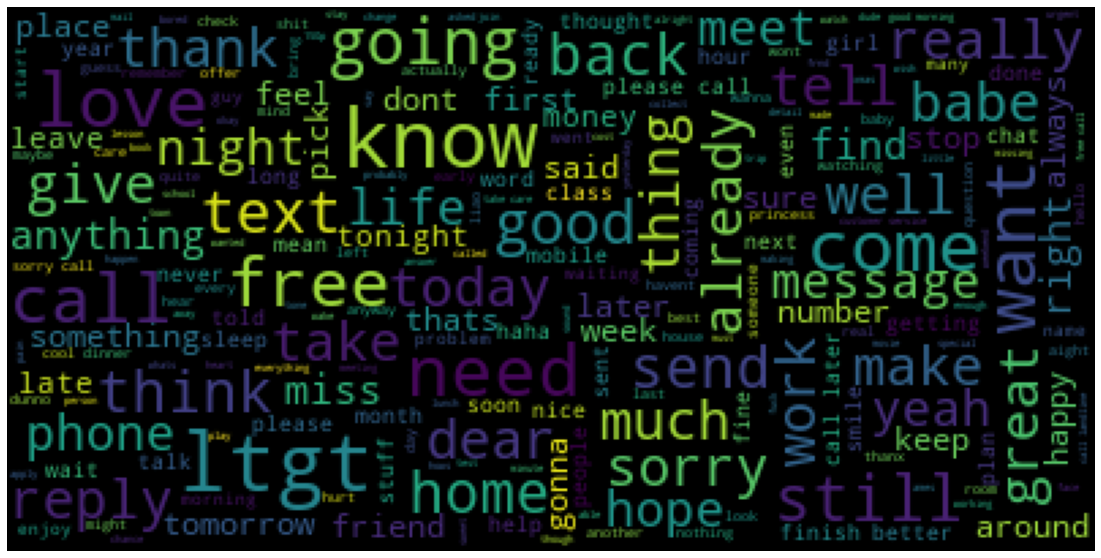

In [25]:
# Generate a basic word cloud 
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [26]:
# Prepare data for the model. Convert label/category in to binary

data['Category'] = [1 if x == 'spam' else 0 for x in data['Category']]
data.head()

,Category,Message,expanded_contractions,removed_accented_chars,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,0,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking],joking
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2...",free entry wkly comp final tkts 21st 2005 text...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]",early already
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah I do not think he goes to usf, he lives ar...","Nah I do not think he goes to usf, he lives ar...",Nah I do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he...","[think, goes, lives, around, here, though]","[think, goes, lives, around, though]","[think, goe, live, around, though]","[think, go, life, around, though]",think go life around though


In [27]:
# Split data in to training, testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

text_train, text_test, y_train, y_test = train_test_split(data['clean_text'], data['Category'], test_size = 0.2)
print(text_train.shape)
print(text_test.shape)

(4457,)
(1115,)


In [28]:
# Convert lemmatized words to Tf-Idf feature vectors

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(text_train)
X_test = tfidf.transform(text_test)
print(X_train.toarray())
print(X_train.shape)
print(X_test.toarray())
print(X_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4457, 6916)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1115, 6916)


In [29]:
# Get a few feature names in the vector
tfidf.get_feature_names()[-5::]

['zindgi', 'zogtorius', 'zoom', 'zouk', 'zyada']

In [31]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Random Forest Classifier model fitted..')
pred = rf.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

Random Forest Classifier model fitted..
Accuracy score : 0.9766816143497757
Confusion matrix : 
 [[978   2]
 [ 24 111]]


In [ ]:
# save model

import pickle
pickle.dump('spamclf.pickle', 'wb')